In [194]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import mplcyberpunk
from scipy.stats import norm
import statsmodels.api as sm

plt.style.use('cyberpunk')


In [135]:
# Extract useful data cols
# TODO: build robust extractor

IDX = ["Name","Roll No.","Q1","Q2","MT","ET", "CP", "PROJ1", "PROJ2","Final",'GPA']
avail = []
df = pd.read_excel('Component-Wise Breakdown latest(AutoRecovered).xlsx', sheet_name='SM-I')

# Get available fields only (discard unnamed and other useless columns)
for key in df.keys():
    if key in IDX: avail.append(key)

df = df[avail]
df.head()

,Name,Roll No.,Q1,Q2,MT,ET,Final,GPA
0,MEGHANA MANOJ,2022IPM084,D,C-,D,C,C,1.567
1,SOURIMA BARUA,2022IPM157,C,C+,D,C-,C,1.567
2,AASTIK AGGARWAL,2023IPM002,B+,B-,A+,B,B,3.400
3,AAYUSH MITTAL,2023IPM003,B-,B,B+,B-,B,2.900
4,ABHIJEET RAJ SETH,2023IPM005,B-,B-,B-,B-,B,2.667


In [140]:
def generate_numeric(df: pd.DataFrame, cols: list):
    """
    Function that takes a component wise marksheet and column name list as input 
    it transforms all grades into their numeric value according to grading table 
    provided in the IPM Manual (without weights.)
    """
    transform = {
        'A+':13, 'A':12, 'A-':11, 'B+': 10, 'B': 9, 'B-': 8,
        'C+': 7, 'C': 6, 'C-': 5, 'D+': 4, 'D': 3, 'D-': 2
    }
    transformer = lambda x: transform[x]
    for col in cols:
        try:
            df[col] = df[col].apply(transformer)
        except KeyError: print(f'Already transformed {col}')

generate_numeric(df, cols=['Q1','Q2','MT', 'ET'])
df

Already transformed Q1
Already transformed Q2
Already transformed MT
Already transformed ET


,Name,Roll No.,Q1,Q2,MT,ET,Final,GPA
0,MEGHANA MANOJ,2022IPM084,3,5,3,6,C,1.567
1,SOURIMA BARUA,2022IPM157,6,7,3,5,C,1.567
2,AASTIK AGGARWAL,2023IPM002,10,8,13,9,B,3.400
3,AAYUSH MITTAL,2023IPM003,8,9,10,8,B,2.900
4,ABHIJEET RAJ SETH,2023IPM005,8,8,8,8,B,2.667
...,...,...,...,...,...,...,...,...
154,NAINIKA TIWARI,2023IPM161,9,13,10,10,B,3.400
155,SARAYU SANDESH PAI,2023IPM162,8,3,5,8,C,2.200
156,HARSH JOSHI,2023IPM164,8,8,13,8,B,3.167
157,ROHAN RAJ,2023IPM166,6,3,5,5,C,1.633


0.6554958054076989


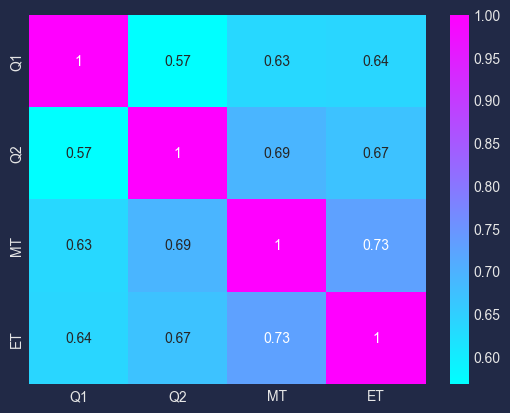

In [139]:
#MEASURING CORR
corr_matrix = df[['Q1', 'Q2', 'MT', 'ET']].corr()
sb.heatmap(corr_matrix, cmap='cool', annot=True)

#AVG CORRELATION:
avg_correlation = (((corr_matrix.mean() * 4) - 1)/3).mean()  #remove the 1 from overlapping correlations
print(avg_correlation)

PVALUE = 0.0009999999999998899


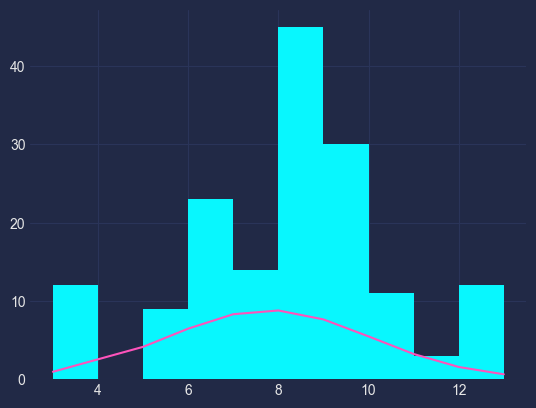

PVALUE = 0.0009999999999998899


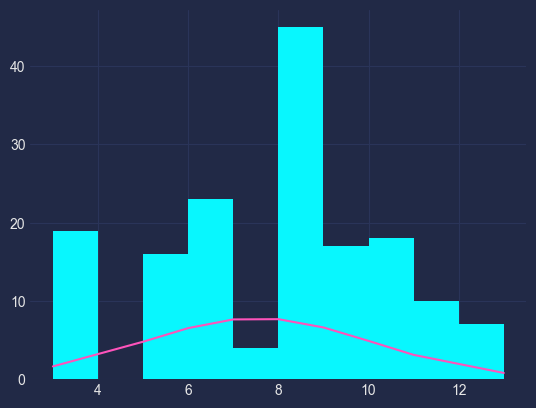

PVALUE = 0.0014324225616462083


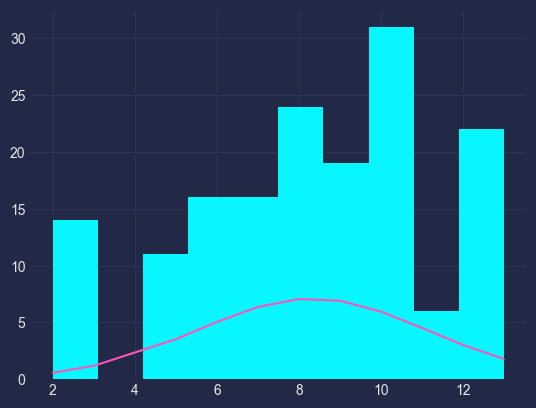

PVALUE = 0.0009999999999998899


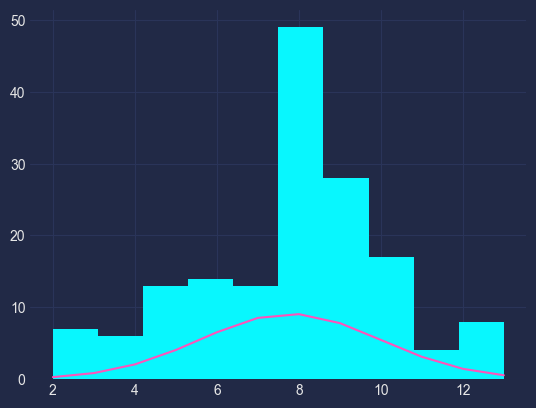

PVALUE = 0.01960441634365976


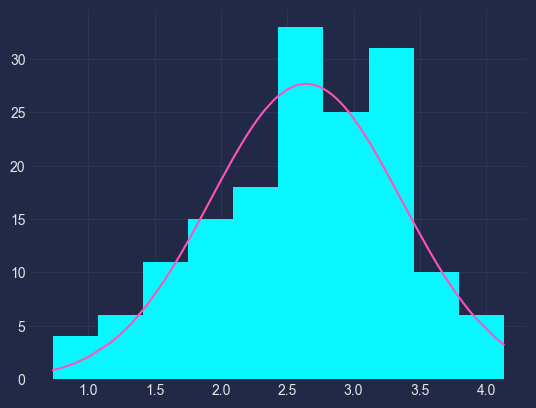

In [155]:
#Graphs of all subjects: 
for field in avail:
    if field not in ['Name', 'Roll No.', 'Final']:
        plt.hist(df[field], bins=10)
        arranged = df[field].sort_values()
        normal = norm.pdf(arranged, arranged.mean(), arranged.std())
        plt.plot(arranged, 50*normal)

        #Test normality
        ksstat, pvalue = sm.stats.diagnostic.lilliefors(arranged)
        print(f'PVALUE = {pvalue}')

        plt.show()